In [17]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import sklearn.metrics
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
data = pd.read_csv("Scaled_BreastCancer_Data.csv")

In [19]:
del data["Unnamed: 0"]

In [20]:
data= data.rename({"diagnosis": "malignant_cancer"}, axis= "columns")
X= data.drop(["Target"], axis= "columns")
y= data["Target"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.25, random_state= 100)

In [22]:
scaler= StandardScaler()

scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [23]:
nn_model = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', 
                                                 alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, 
                                                 max_iter=1000, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                                                 nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                                                 n_iter_no_change=10)

nn_model.fit(X_train_scaled, y_train)

y_pred= nn_model.predict(X_test_scaled)

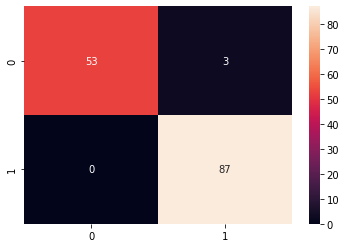

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

accuracy_score(y_test, y_pred)

sns.heatmap(cm, annot=True)

In [26]:
y_predicted_train = nn_model.predict(X_train)
y_predicted_test = nn_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [27]:
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score 


accuracy_train = accuracy_score(y_train, y_predicted_train)
print("Training Accuracy for Neural Net Model: ", accuracy_train*100)

accuracy_test = accuracy_score(y_test, y_predicted_test)
print("Testing Accuracy for Neural Net Model: ", accuracy_test*100)

Training Accuracy for Neural Net Model:  99.76525821596243
Testing Accuracy for Neural Net Model:  96.5034965034965
